
# Bike Sales 



-- Sobre o dados : -- São dados de diversas lojas de bike, mas não somente em um país, mas sim em uma das 6 maiores economia do mundo.

-- Objetivo --

1.  O problema dos dados é relativamente se igualar e saber informações de outras lojas em outros países, ver qual pais vende mais, quais produtos se destacam, ver qual gênero se interessa mais e qual o melhor tempo de venda etc..


2. saber as medias e os lucros de lojas opostas e por medidas de demonstração de gráficos 


3. fazer uma comparação entre as duas lojas que mais vendem, e a que menos vendeu, nisso, fazer que a maquina faça uma predição de quanto deve faturar e receber naquele país.

## Imports 

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [208]:
df = pd.read_csv('Sales.csv')

In [209]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [4]:
df.shape

(113036, 18)

# Check Nan

In [5]:
def checknull (csvs):
    for csv in csvs:
        print(df.isnull().sum())
        break
    
    

In [6]:
checknull(df)

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [8]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [9]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Quantity Product

In [10]:
#df['Product'] = df['Product'].value_counts().sort_values(ascending=False)

In [11]:
df['Product'].value_counts()

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

# Category Product 

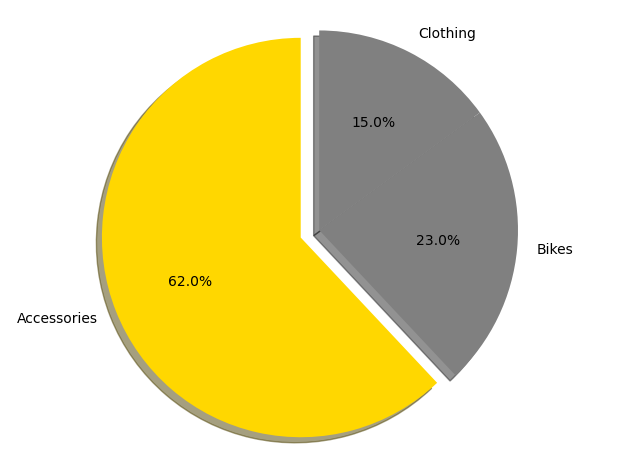

In [12]:
votos = df['Product_Category'].value_counts()
votos = votos.astype(float)
candi = votos.index.tolist()

cores=['gold','gray', 'gray']

explode = (0.1,) + (0,) * (len(votos) - 1)

plt.pie(votos, explode=explode, labels=candi, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.tight_layout()
plt.show()


## gender that predominates in shopping

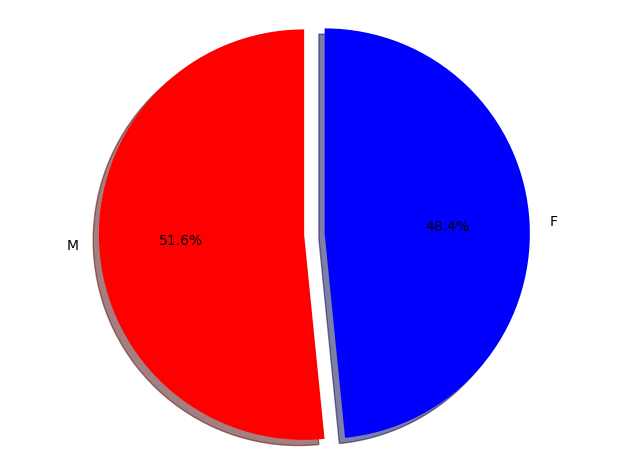

In [13]:
votos = df['Customer_Gender'].value_counts()
votos = votos.astype(float)
candi = votos.index.tolist()

cores=['red', 'blue']

explode = (0.1,) + (0,) * (len(votos) - 1)

plt.pie(votos, explode=explode, labels=candi, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.tight_layout()
plt.show()


In [14]:
df['Sub_Category'].count()

113036

# Products that the two genders but bought

Tires and Tubes      17532
Bottles and Cages     8068
Road Bikes            6892
Helmets               6364
Mountain Bikes        4380
Jerseys               3176
Caps                  2196
Fenders               2154
Touring Bikes         1858
Gloves                1476
Shorts                 960
Cleaners               940
Hydration Packs        686
Socks                  586
Vests                  512
Bike Racks             324
Bike Stands            208
Name: Sub_Category, dtype: int64
 
Esse foi a quantidade que o gênero masculino comprou : 
58312


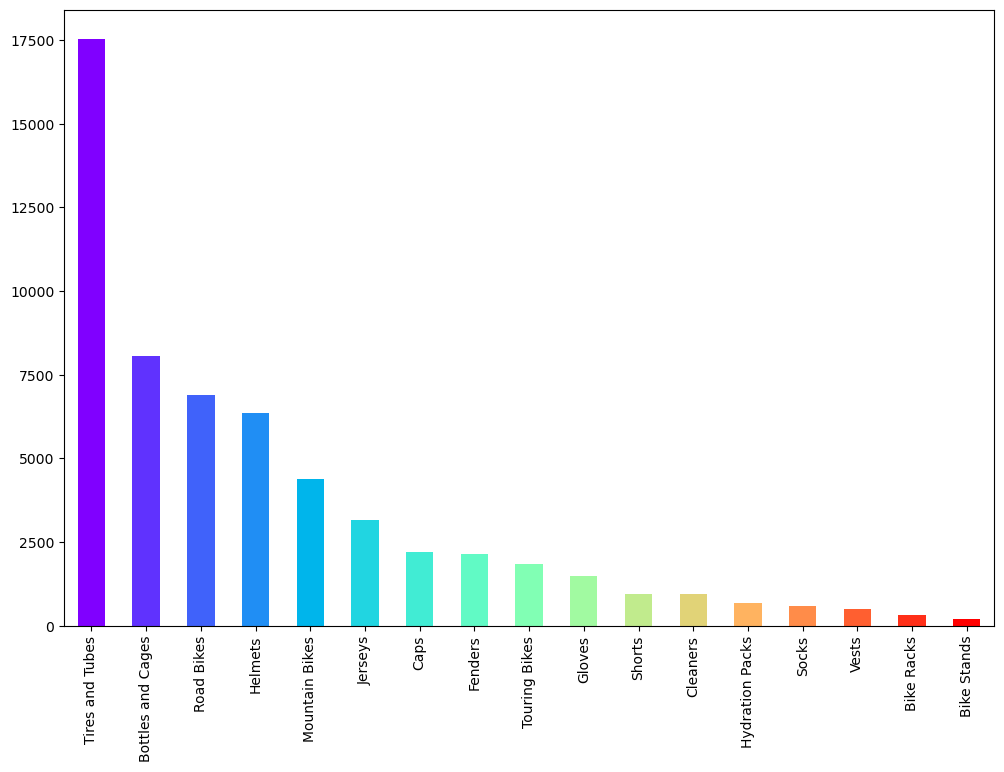

In [15]:
#here are all male gender divided into quantities of products purchased by them

print(df[df['Customer_Gender'] == 'M']['Sub_Category'].value_counts())
print(' ')
print('Esse foi a quantidade que o gênero masculino comprou : ')
print(df[df['Customer_Gender'] == 'M']['Sub_Category'].count())

counts = df[df['Customer_Gender'] == 'M']['Sub_Category'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(counts))))

plt.show()

Tires and Tubes      16338
Bottles and Cages     7808
Road Bikes            6538
Helmets               5794
Mountain Bikes        4474
Jerseys               2834
Caps                  2162
Fenders               1878
Touring Bikes         1840
Gloves                1210
Cleaners               862
Shorts                 834
Hydration Packs        648
Socks                  536
Vests                  452
Bike Racks             268
Bike Stands            248
Name: Sub_Category, dtype: int64
 
Esse foi a quantidade que o gênero Feminino comprou : 
54724


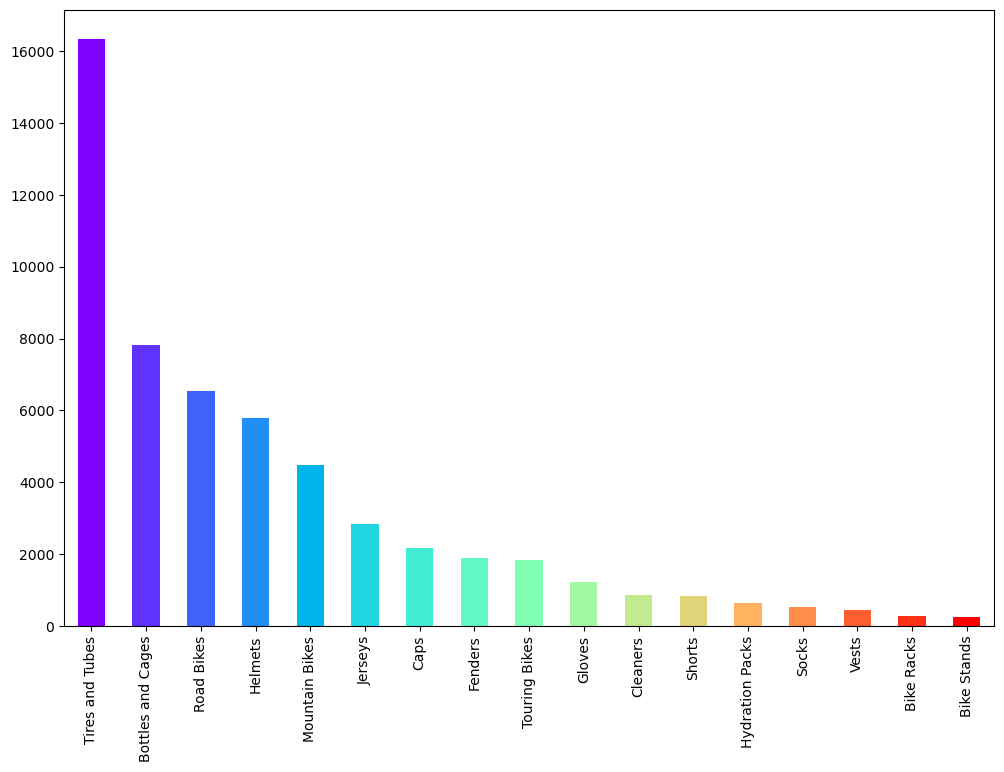

In [16]:
print(df[df['Customer_Gender'] == 'F']['Sub_Category'].value_counts())
print(' ')
print('Esse foi a quantidade que o gênero Feminino comprou : ')
print(df[df['Customer_Gender'] == 'F']['Sub_Category'].count())


counts = df[df['Customer_Gender'] == 'F']['Sub_Category'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(counts))))

plt.show()

# sales data broken down by gender in the USA

In [17]:
df_usa_m= df.query("(Customer_Gender == 'M') & (Country == 'United States')")
df_usa_m.value_counts().sum()

20272

Tires and Tubes      6076
Bottles and Cages    2986
Helmets              2108
Road Bikes           1922
Mountain Bikes       1532
Jerseys              1084
Fenders              1004
Caps                  688
Touring Bikes         572
Gloves                564
Shorts                470
Cleaners              360
Socks                 256
Hydration Packs       248
Vests                 200
Bike Racks            140
Bike Stands            62
Name: Sub_Category, dtype: int64
 
Esse foi a quantidade que o gênero Feminino comprou : 
20272


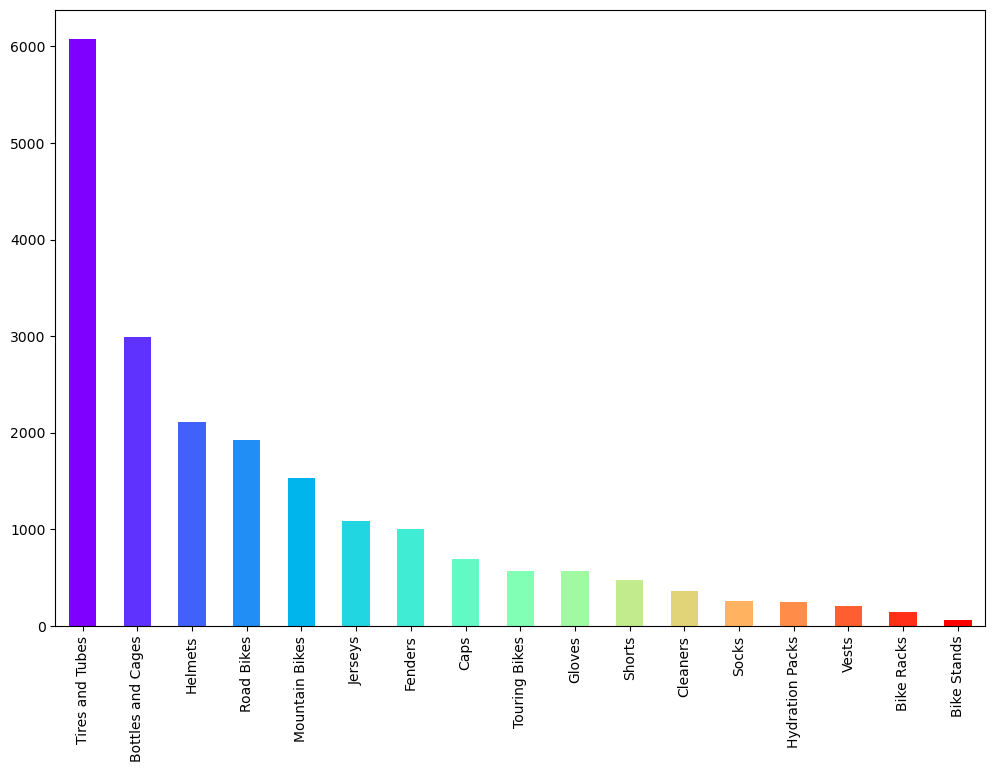

In [18]:
print(df_usa_m[df_usa_m['Customer_Gender'] == 'M']['Sub_Category'].value_counts())
print(' ')
print('Esse foi a quantidade que o gênero Feminino comprou : ')
print(df_usa_m[df_usa_m['Customer_Gender'] == 'M']['Sub_Category'].count())


counts = df_usa_m[df_usa_m['Customer_Gender'] == 'M']['Sub_Category'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(counts))))

plt.show()

In [19]:
df_usa_f= df.query("(Customer_Gender == 'F') & (Country == 'United States')")
df_usa_f.value_counts().sum()

18934

Tires and Tubes      5666
Bottles and Cages    2858
Helmets              1928
Road Bikes           1920
Mountain Bikes       1516
Jerseys               964
Fenders               836
Caps                  658
Touring Bikes         566
Shorts                440
Gloves                428
Cleaners              344
Hydration Packs       230
Socks                 212
Vests                 172
Bike Racks            102
Bike Stands            94
Name: Sub_Category, dtype: int64
 
Esse foi a quantidade que o gênero Feminino comprou : 
18934


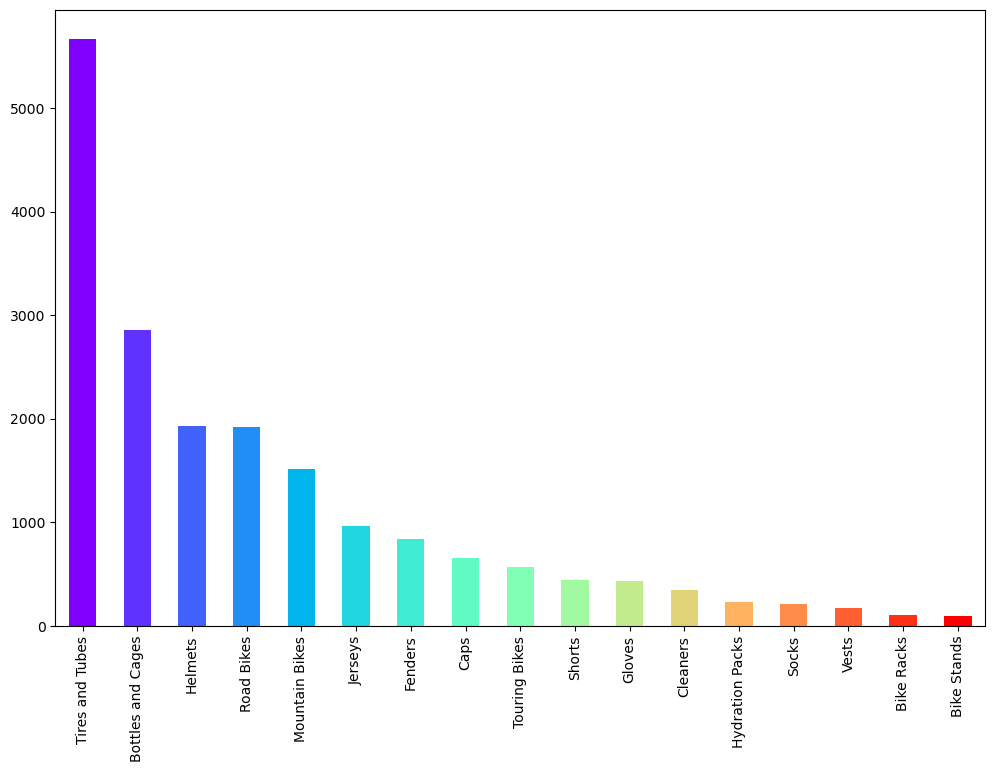

In [20]:
print(df_usa_f[df_usa_f['Customer_Gender'] == 'F']['Sub_Category'].value_counts())
print(' ')
print('Esse foi a quantidade que o gênero Feminino comprou : ')
print(df_usa_f[df_usa_f['Customer_Gender'] == 'F']['Sub_Category'].count())


counts = df_usa_f[df_usa_f['Customer_Gender'] == 'F']['Sub_Category'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(counts))))

plt.show()


# best selling state

In [21]:
df['State'].value_counts()

California             22450
British Columbia       14116
England                13620
Washington             11264
New South Wales        10412
Victoria                6016
Oregon                  5286
Queensland              5220
Saarland                2770
Nordrhein-Westfalen     2484
Hessen                  2384
Seine (Paris)           2328
Hamburg                 1836
Seine Saint Denis       1684
Nord                    1670
South Australia         1564
Bayern                  1426
Hauts de Seine          1084
Essonne                  994
Yveline                  954
Tasmania                 724
Seine et Marne           394
Moselle                  386
Loiret                   382
Val d'Oise               264
Garonne (Haute)          208
Brandenburg              198
Val de Marne             158
Charente-Maritime        148
Somme                    134
Loir et Cher             120
Pas de Calais             90
Alberta                   56
Texas                     30
Ohio          

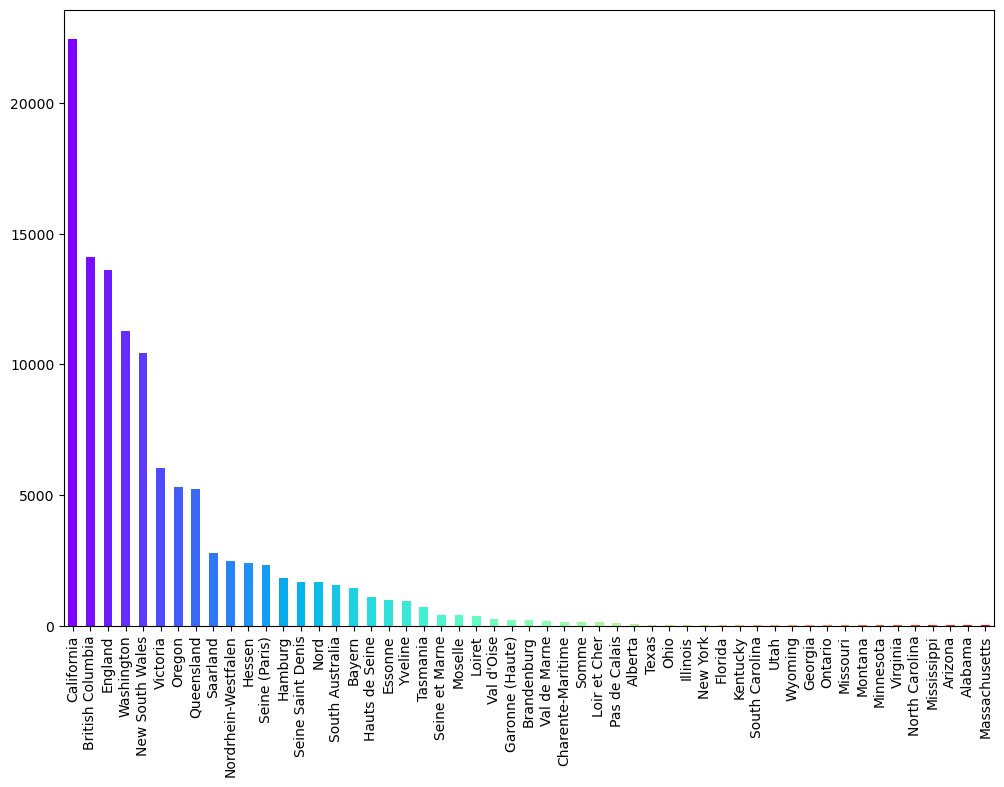

In [22]:
counts = df['State'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar',color=plt.cm.rainbow(np.linspace(0, 1, len(counts))));

# best selling state in usa

In [23]:
df_usa = df.query("Country == 'United States'")

In [24]:
df_usa['State'].value_counts()

California        22450
Washington        11264
Oregon             5286
Texas                30
Illinois             28
Ohio                 28
New York             20
Florida              14
Kentucky             10
South Carolina       10
Utah                 10
Georgia               8
Wyoming               8
Montana               6
Minnesota             6
Missouri              6
Mississippi           4
Arizona               4
Virginia              4
North Carolina        4
Alabama               4
Massachusetts         2
Name: State, dtype: int64

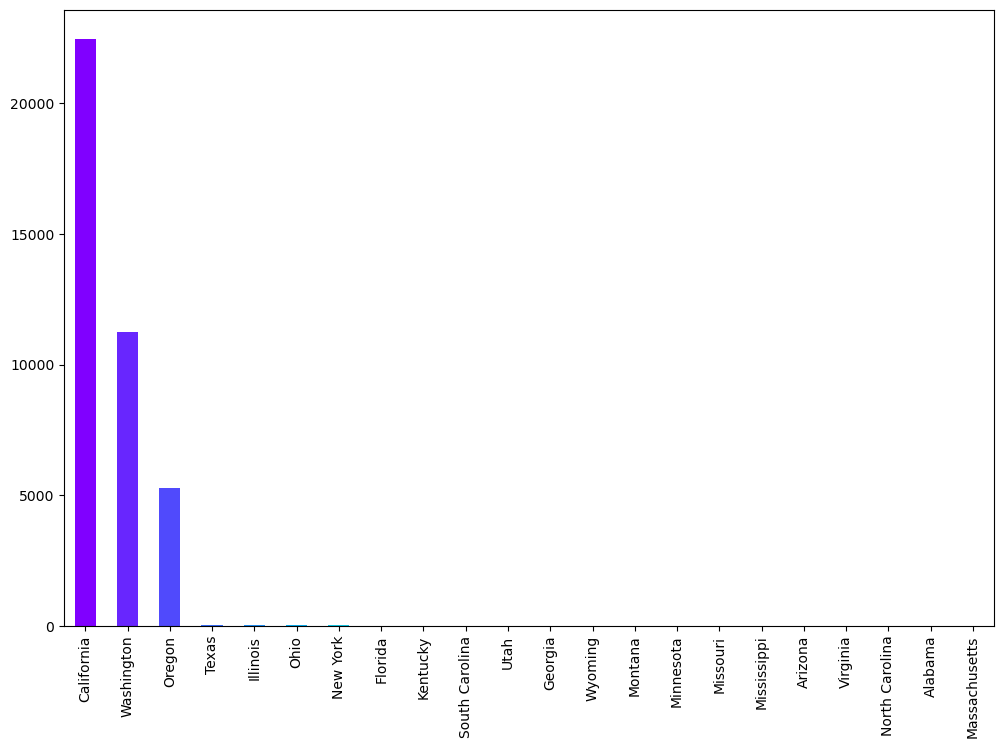

In [25]:
counts = df_usa['State'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(counts))));


## best selling product category

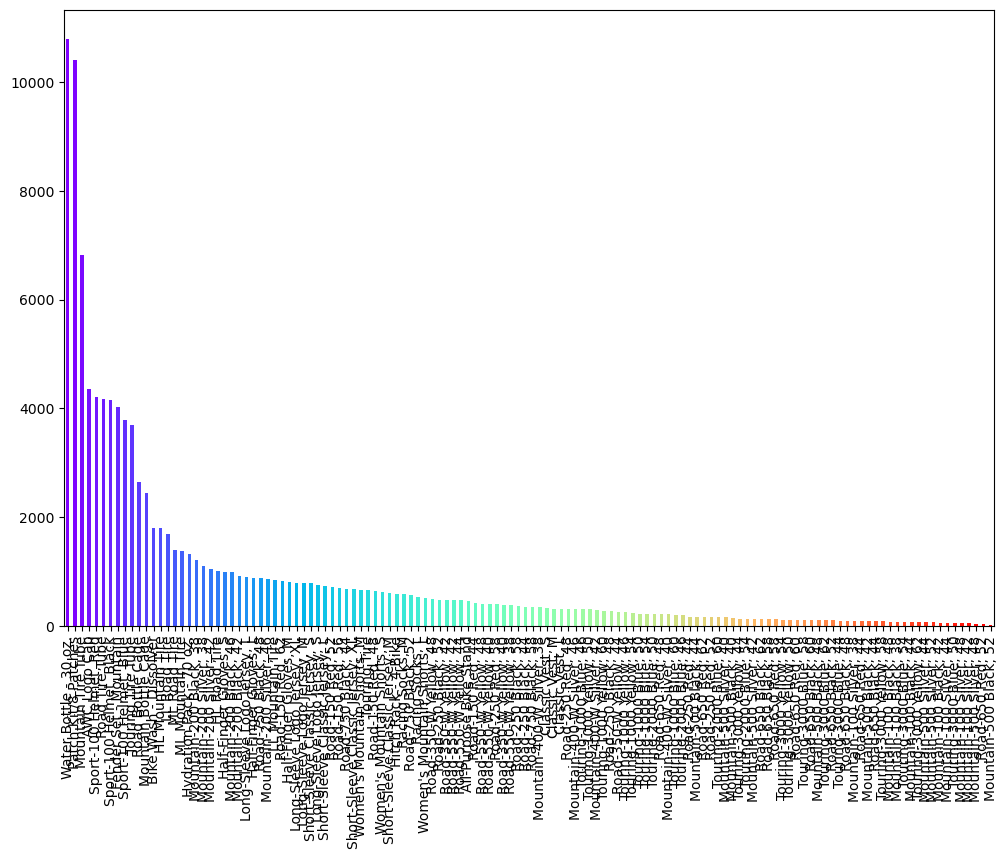

In [26]:
counts = df['Product'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(counts))))

plt.show()

## best selling Sub Category 

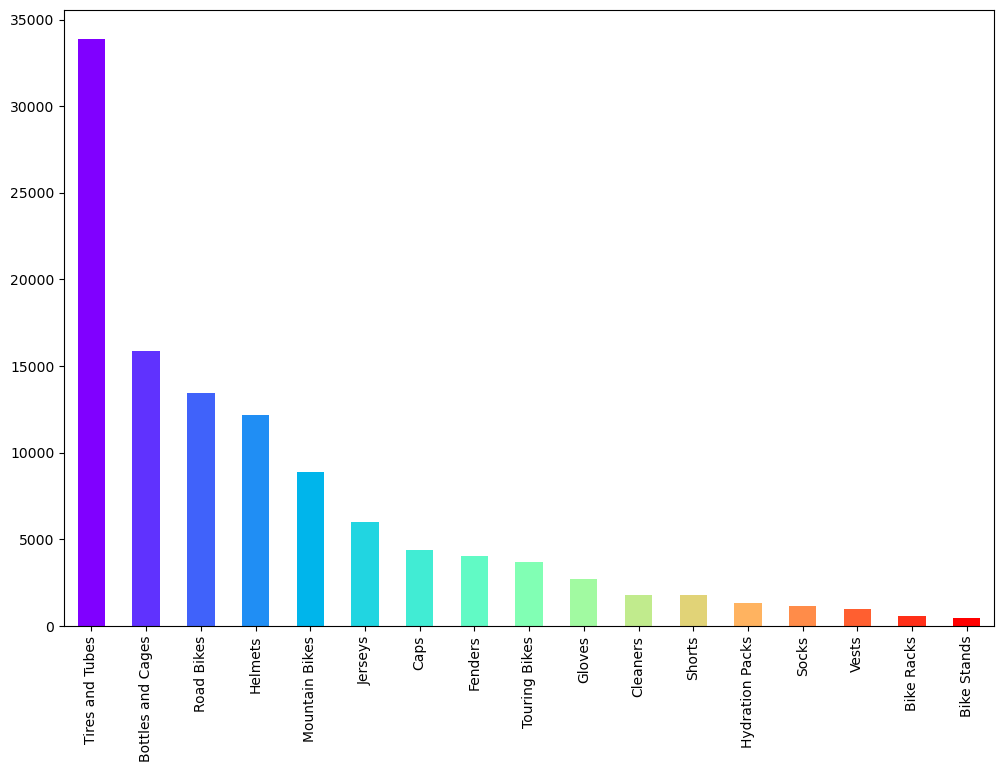

In [27]:
counts = df['Sub_Category'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(counts))))

plt.show()

## the month that sells the most

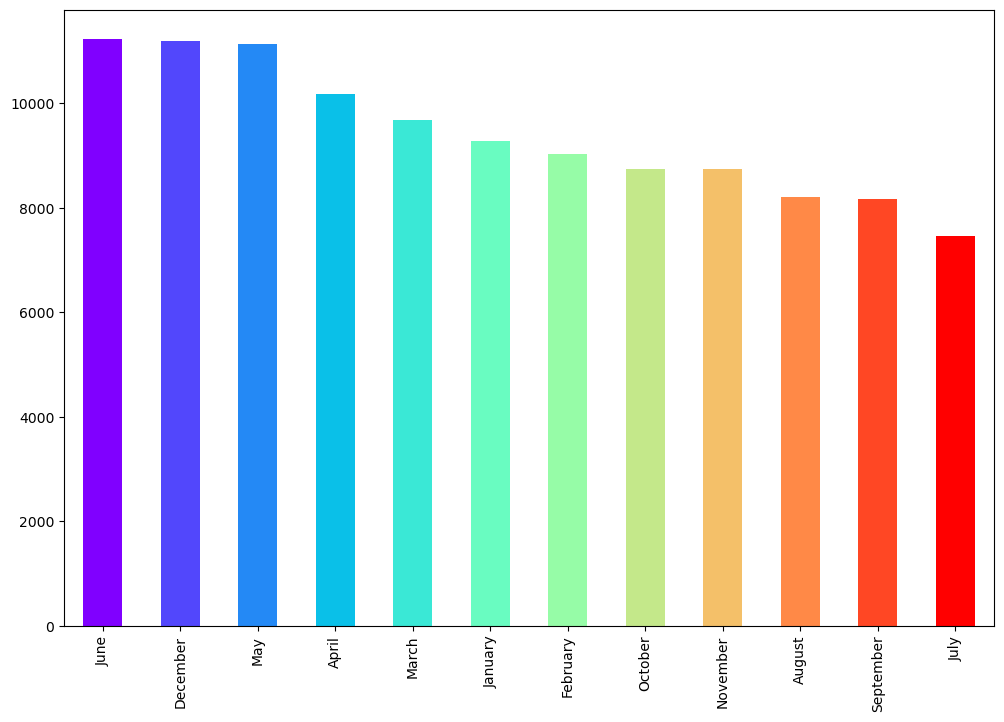

In [28]:
counts = df['Month'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(counts))))

plt.show()

## the day that sells the most

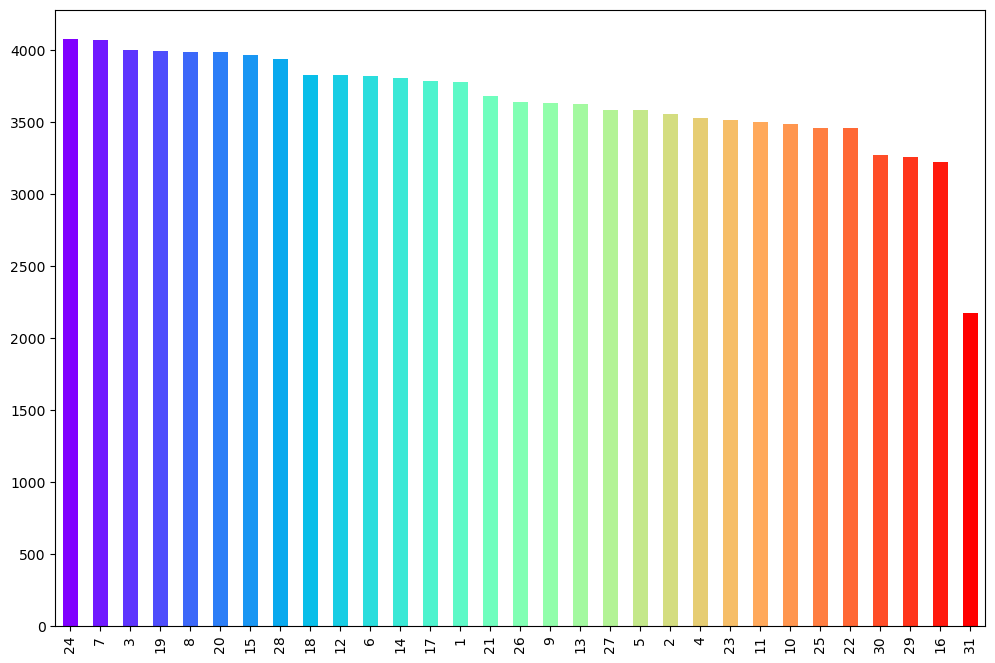

In [29]:
counts = df['Day'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(counts))))

plt.show()

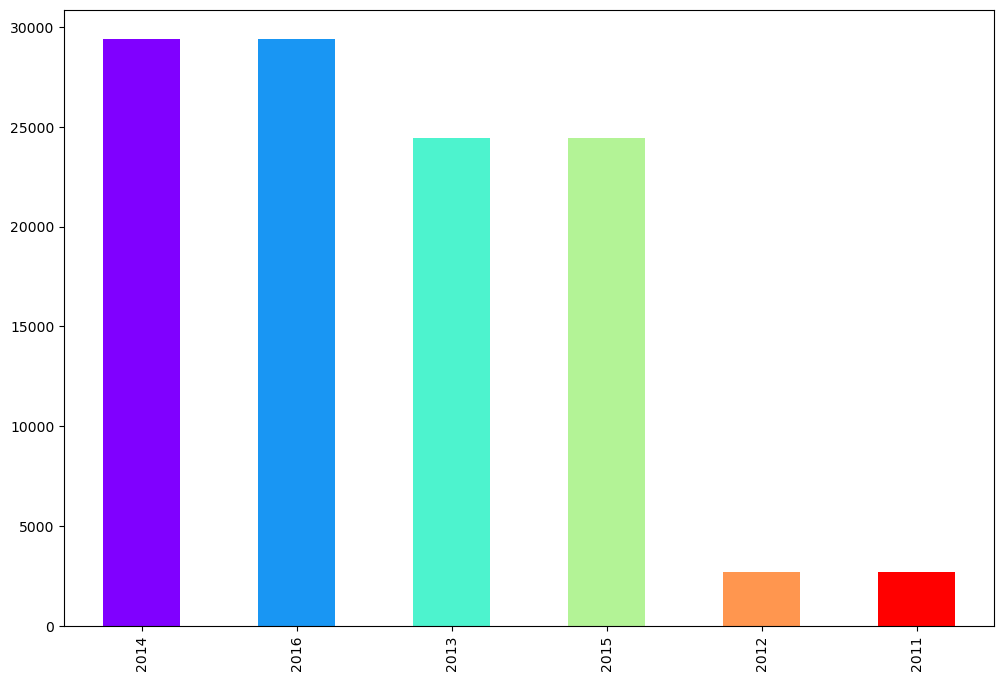

In [30]:
counts = df['Year'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(counts))))

plt.show()

## dates more sell 

In [31]:
print(df['Date'].value_counts())


2016-03-01    288
2014-03-01    288
2013-12-07    241
2015-12-07    241
2016-06-14    236
             ... 
2011-02-21      1
2012-02-21      1
2012-05-29      1
2011-05-29      1
2012-11-04      1
Name: Date, Length: 1884, dtype: int64


# the top 15 countries 

<AxesSubplot:>

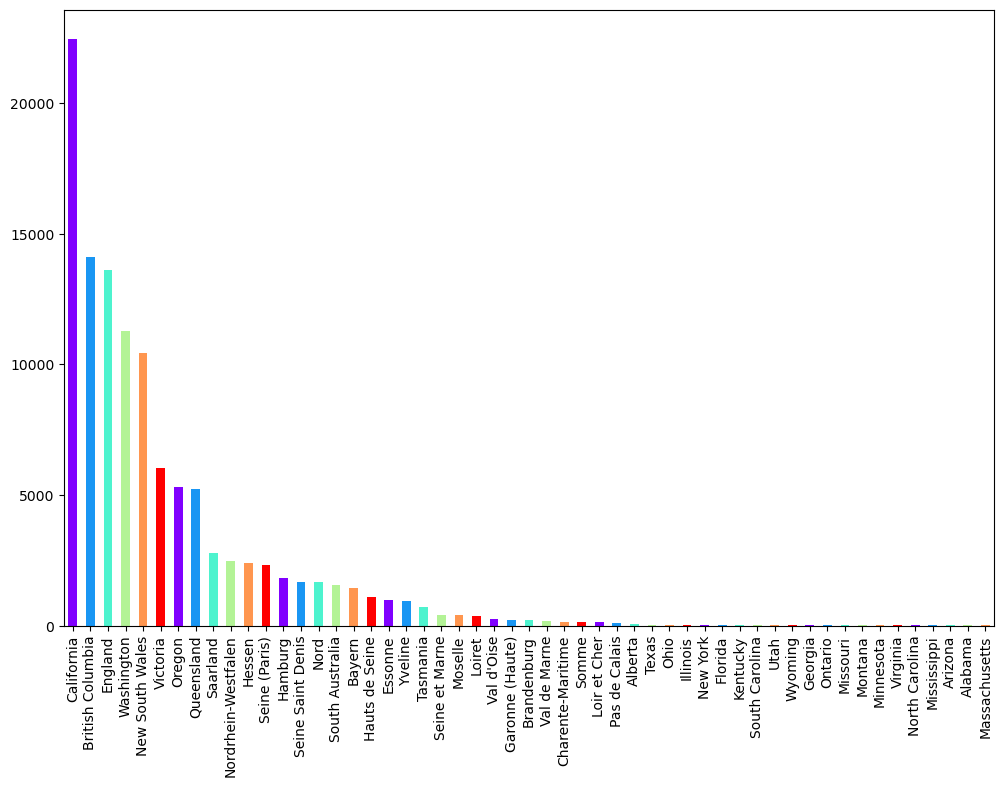

In [32]:
# the top 15 countries 

cont= df['State'].value_counts()

fig, ax = plt.subplots(figsize=(12,8))
cont.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0,1, len(counts))))

## 6 Countrys analyzed 

In [33]:
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

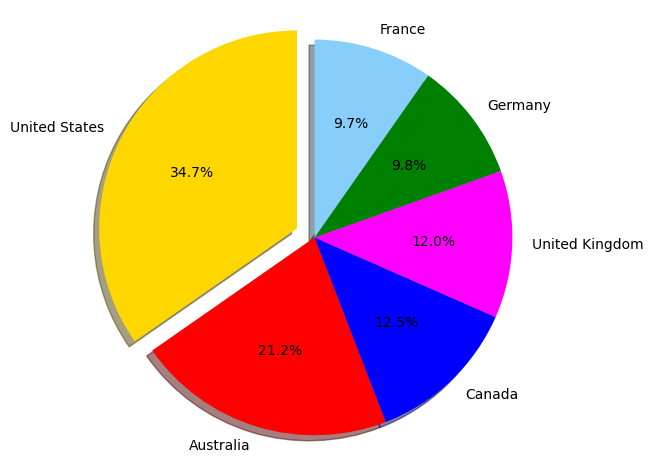

In [34]:
votos = df['Country'].value_counts()
votos = votos.astype(float)
candi = votos.index.tolist()

cores=['gold', 'red', 'blue', 'magenta', 'green','lightskyblue']

explode = (0.1,) + (0,) * (len(votos) - 1)

plt.pie(votos, explode=explode, labels=candi, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.tight_layout()
plt.show()


# Numerical Analysis and Visualation 

In [35]:
df['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [36]:
df['Unit_Cost'].mean()

267.296365759581

In [37]:
df['Unit_Cost'].median()

9.0

<AxesSubplot:>

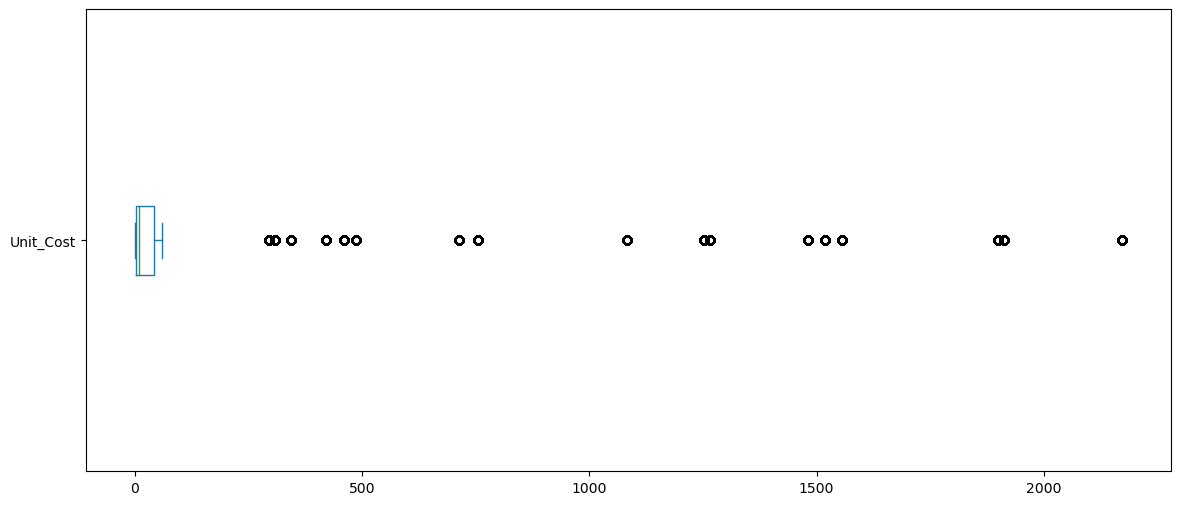

In [38]:
df['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

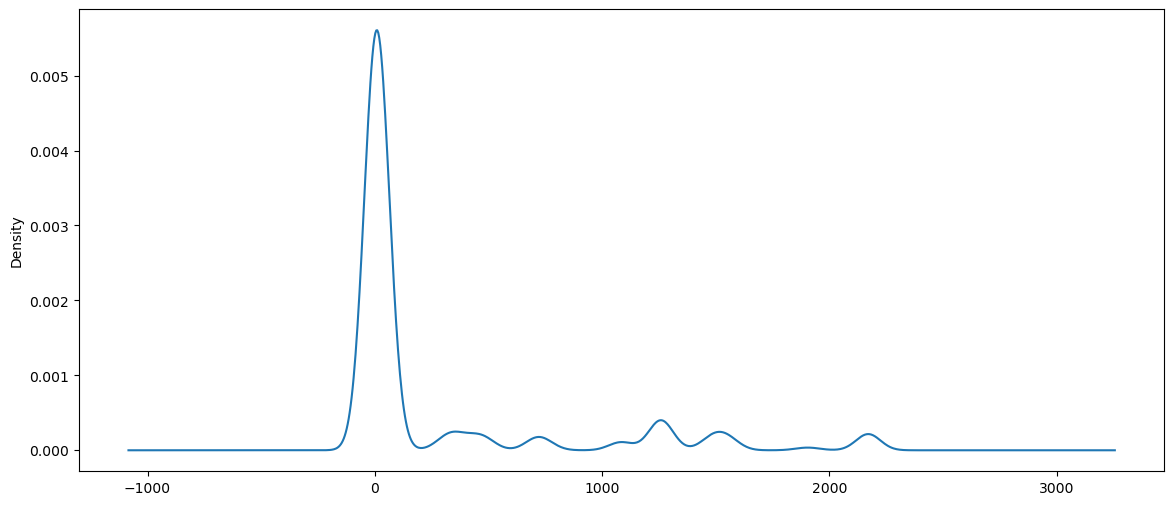

In [39]:
# sales density

df['Unit_Cost'].plot(kind='density', figsize=(14,6)) 

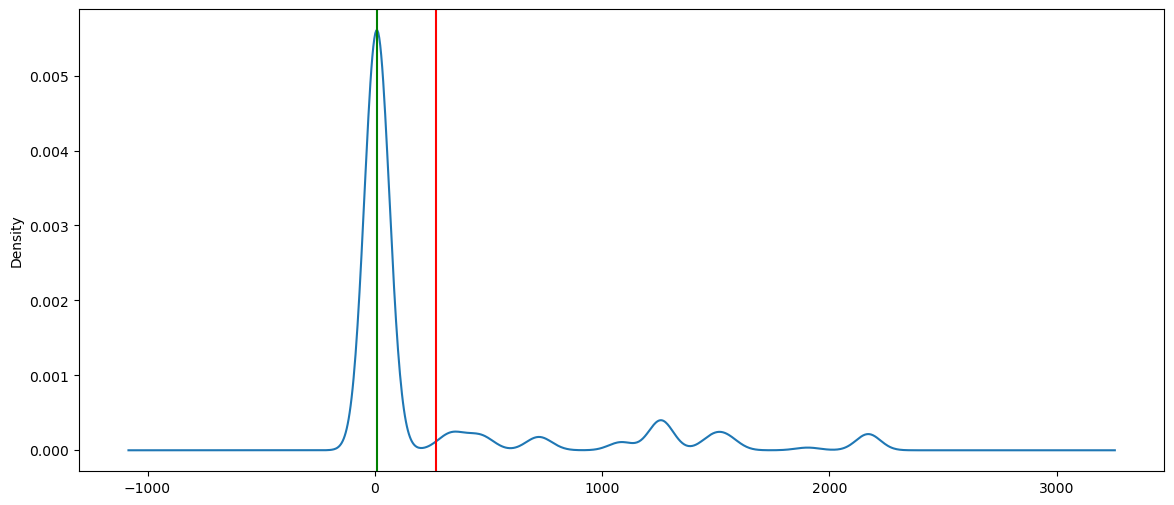

In [40]:
# cost unit sales density

ax = df['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['Unit_Cost'].mean(), color='red')
ax.axvline(df['Unit_Cost'].median(), color='green')


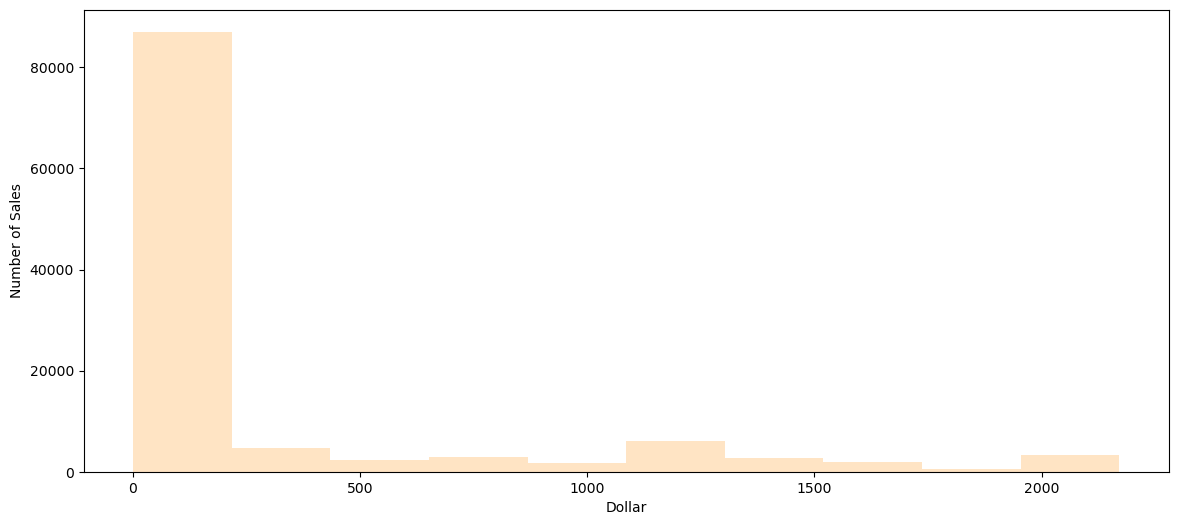

In [41]:
ax = df['Unit_Cost'].plot(kind='hist',color='bisque', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollar');

# Category Analysis and visualation

In [42]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [43]:
df['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

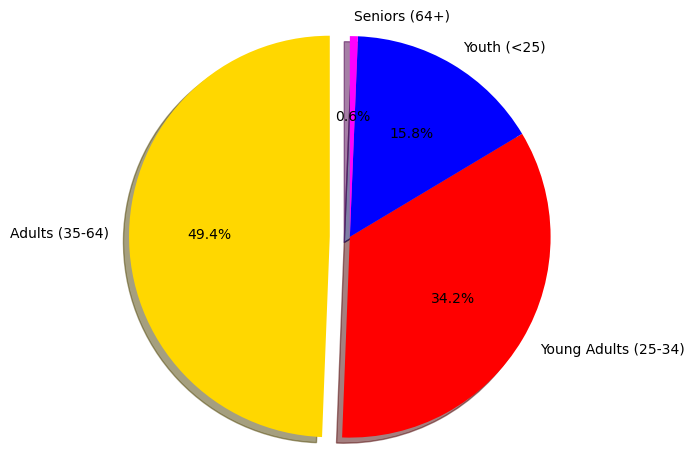

In [44]:
votos = df['Age_Group'].value_counts()
votos = votos.astype(float)
candi = votos.index.tolist()

cores=['gold', 'red', 'blue', 'magenta', 'green','lightskyblue']

explode = (0.1,) + (0,) * (len(votos) - 1)

plt.pie(votos, explode=explode, labels=candi, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.tight_layout()
plt.show()

# Relation between of columns 

In [45]:
corr = df.corr()
corr 

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


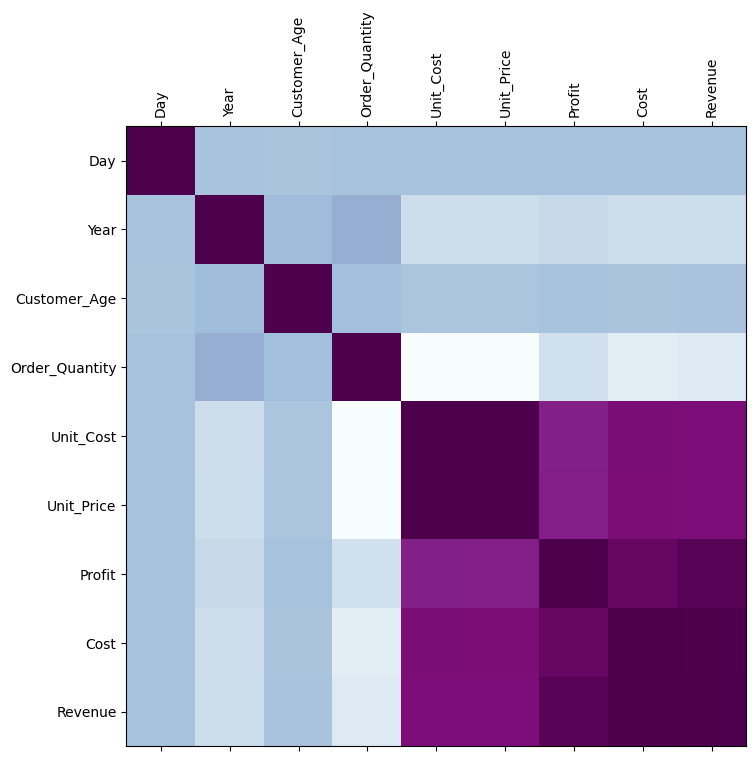

In [46]:
import matplotlib.pyplot as plt2

fig = plt2.figure(figsize=(8,8))
plt2.matshow(corr, cmap='BuPu', fignum=fig.number)
plt2.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt2.yticks(range(len(corr.columns)), corr.columns);


<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

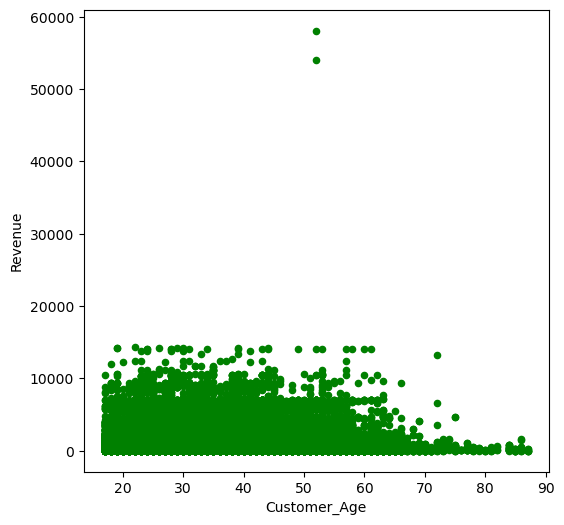

In [47]:
df.plot(kind='scatter', x='Customer_Age', y='Revenue',color='green', figsize=(6,6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

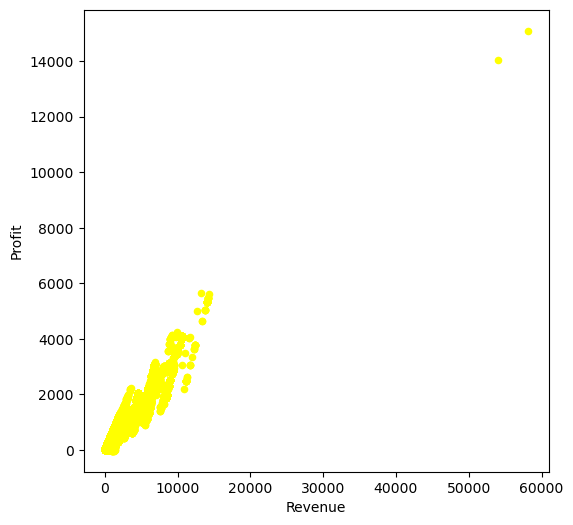

In [48]:
df.plot(kind='scatter', x='Revenue', y='Profit',color='yellow', figsize=(6,6))

Text(0, 0.5, 'Profit')

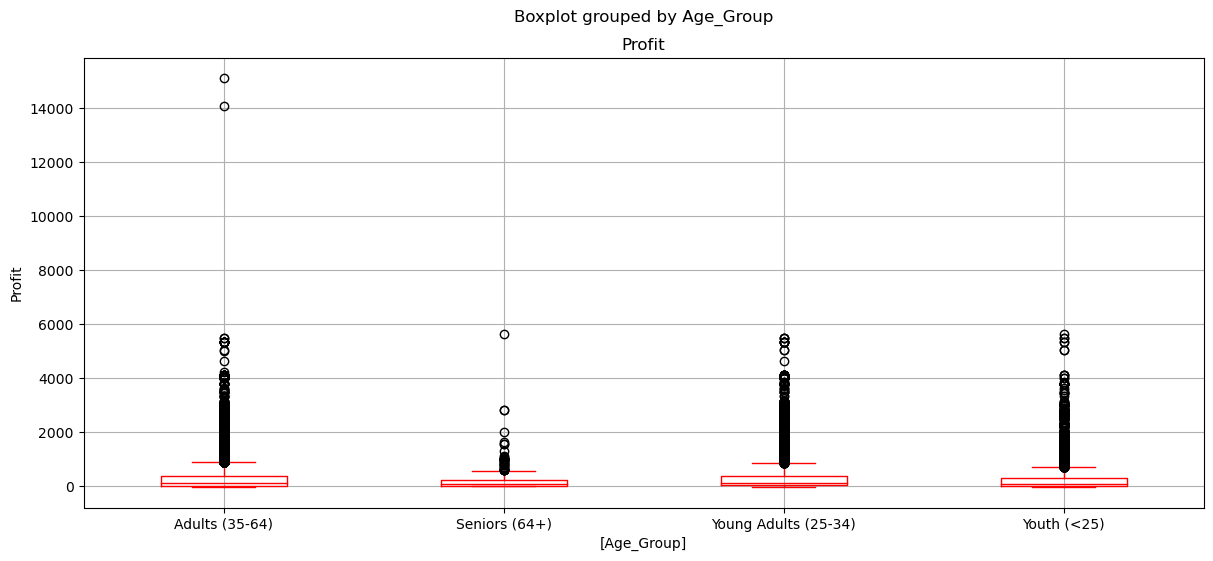

In [49]:
ax = df[['Profit','Age_Group']].boxplot(by='Age_Group',color='red', figsize=(14,6))
ax.set_ylabel("Profit")

Year                 AxesSubplot(0.125,0.53;0.227941x0.35)
Customer_Age      AxesSubplot(0.398529,0.53;0.227941x0.35)
Order_Quantity    AxesSubplot(0.672059,0.53;0.227941x0.35)
Unit_Cost            AxesSubplot(0.125,0.11;0.227941x0.35)
Unit_Price        AxesSubplot(0.398529,0.11;0.227941x0.35)
Profit            AxesSubplot(0.672059,0.11;0.227941x0.35)
dtype: object

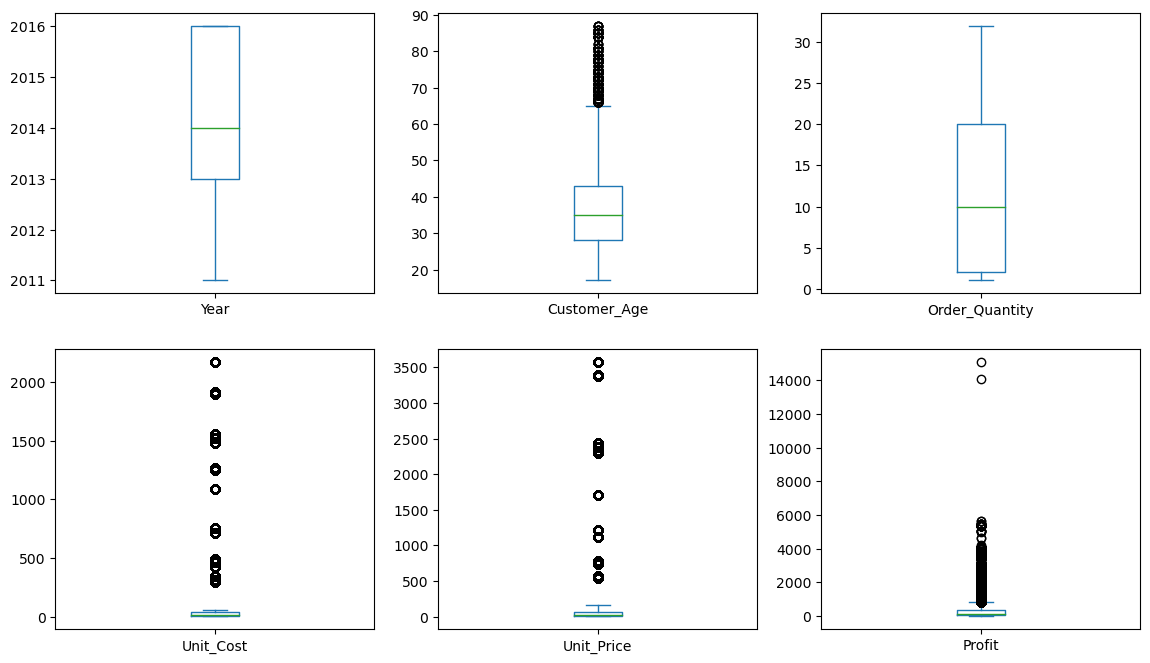

In [50]:
boxplot_cols = ['Year', 'Customer_Age','Order_Quantity','Unit_Cost','Unit_Price', 'Profit']
df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

# Add and calculate a new Calculated_Cost column

In [51]:
df['Revenue_per_Age'] = df['Revenue'] / df['Customer_Age']
df['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

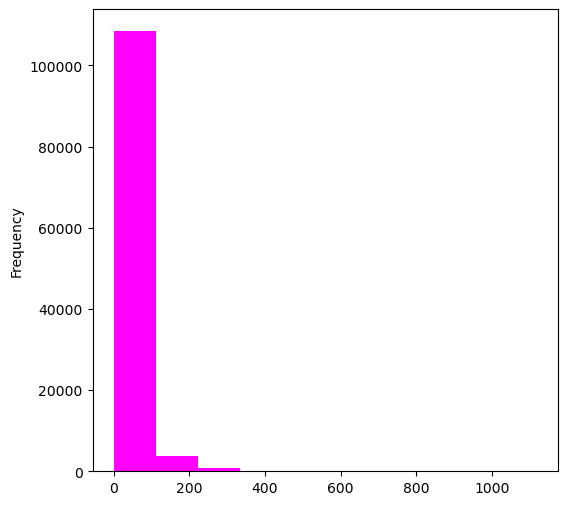

In [52]:
cores=[ 'magenta']
df['Revenue_per_Age'].plot(kind='hist',color=cores, figsize=(6,6))

<AxesSubplot:ylabel='Density'>

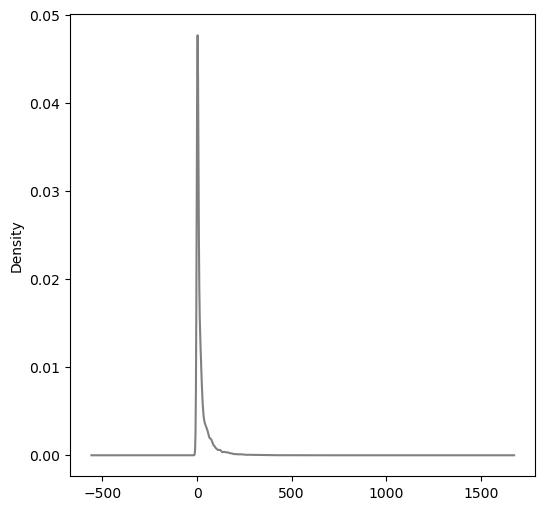

In [53]:
df['Revenue_per_Age'].plot(kind='density',color='gray', figsize=(6,6))

# Add and calculate new columns 

In [54]:
df['Calculated_Cost'] = df['Order_Quantity'] / df['Unit_Cost']
df['Calculated_Cost']

0         0.177778
1         0.177778
2         0.511111
3         0.444444
4         0.088889
            ...   
113031    0.125000
113032    0.916667
113033    0.916667
113034    1.000000
113035    0.958333
Name: Calculated_Cost, Length: 113036, dtype: float64

In [55]:
(df['Calculated_Cost'] != df['Cost']).sum()

98444

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

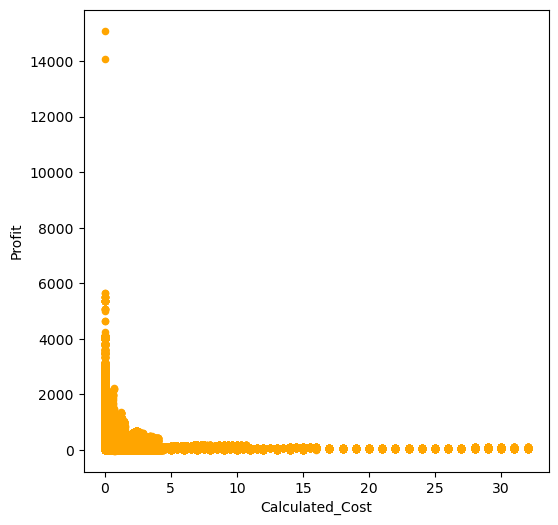

In [56]:
df.plot(kind='scatter', x='Calculated_Cost', y='Profit',color='orange',figsize=(6,6))

# Add and calculate new columns

In [57]:
df['Calculated_Cost'] = df['Cost'] + df['Profit']
df['Calculated_Cost'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Cost, dtype: int64

In [58]:
(df['Calculated_Cost'] != df['Revenue']).sum()

0

In [59]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,4.487805,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,65.722222,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,65.722222,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,34.054054,1260


<AxesSubplot:ylabel='Frequency'>

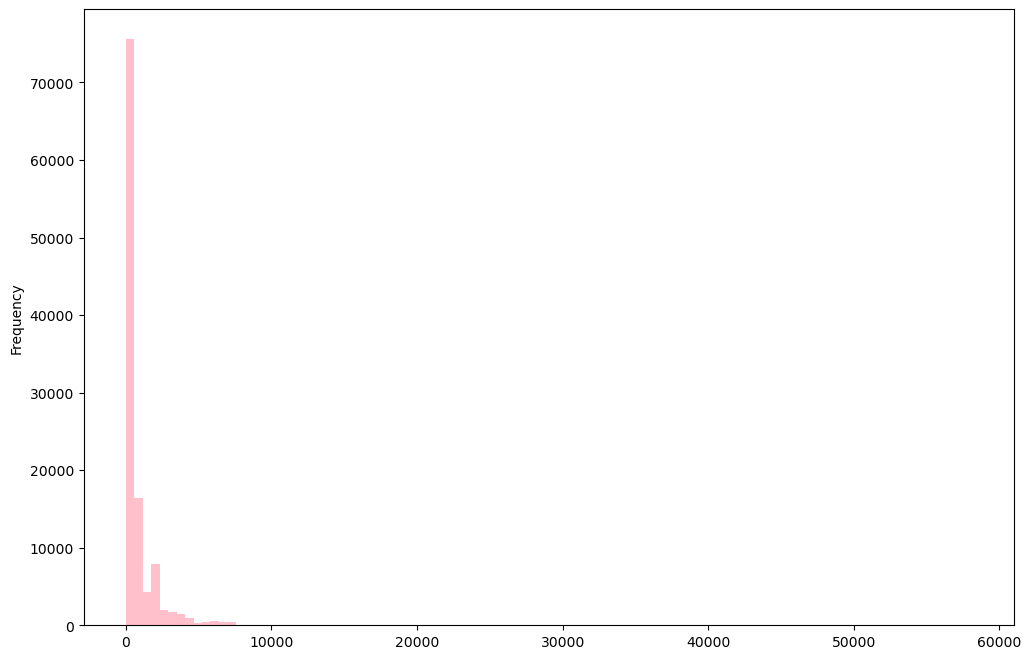

In [60]:
df['Revenue'].plot(kind='hist', bins=100,color='pink', figsize=(12,8))

# modify all UNIT_PRiCE values adding 3% tax to them

In [61]:
df['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [62]:
#df['Unit_Price'] * 1.03


df['Unit_Price'] *= 1.03

In [63]:
df['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

# Selection & Indexing:

### Get all sales made in the state of Kentucky

In [64]:
df.loc[df['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30.90,32,22,54,1.350,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30.90,336,231,567,14.175,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30.90,16,11,27,0.675,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30.90,288,198,486,12.150,486


### Get the mean revenue of the adults(35-64) sales group

In [65]:
df.loc[df['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

## How Many record belong to Age Group Youth(>25) or adults (35-64)

In [66]:
df.loc[(df['Age_Group'] == 'Youth (<25)') | (df['Age_Group'] == 'Adults (35-64)')].shape[0] 

73652

## get the mean revenue of the sales groups Adults (35-64) in United states

In [67]:
df.loc[(df['Age_Group'] == 'Adults (35-64)') | (df['State'] == "United State"), 'Revenue'].mean()

762.8287654055604

## Increase the revenue by 10% to every sale made in France 

In [68]:
df_france = df[(df['Country'] == 'France') | (df['Unit_Cost'])]

In [69]:
df_france['Profit'].sum()

32221100

In [70]:
df.loc[df['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [71]:
df_france['Unit_Cost'].sum()

30214112

In [72]:
df_france['Unit_Price'].sum()

52734298.440000005

In [73]:
df.loc[df['Country'] == 'France', 'Revenue'] *= 1.1

In [74]:
df.loc[df['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

In [75]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,123.60,590,360,950.0,50.000000,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,123.60,590,360,950.0,50.000000,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,123.60,1366,1035,2401.0,49.000000,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,123.60,1188,900,2088.0,42.612245,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,123.60,238,180,418.0,8.893617,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,65.92,112,72,184.0,4.487805,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,65.92,655,528,1183.0,65.722222,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,65.92,655,528,1183.0,65.722222,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,65.92,684,576,1386.0,34.054054,1260


# what profited the most >>

In [76]:
df_usa = df.query("Country == 'United States'")
df_usa

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
22,2014-03-27,27,March,2014,51,Adults (35-64),M,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,123.60,524,405,929.0,18.215686,929
23,2016-03-27,27,March,2016,51,Adults (35-64),M,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,123.60,407,315,722.0,14.156863,722
34,2013-07-19,19,July,2013,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,123.60,524,405,929.0,29.031250,929
35,2015-07-19,19,July,2015,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,123.60,524,405,929.0,29.031250,929
38,2013-07-13,13,July,2013,43,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,10,45,123.60,726,450,1176.0,27.348837,1176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113021,2015-10-02,2,October,2015,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",24,24,65.92,929,576,1505.0,44.264706,1505
113022,2014-03-20,20,March,2014,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",28,24,65.92,1084,672,1756.0,51.647059,1756
113023,2016-03-20,20,March,2016,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",26,24,65.92,1007,624,1631.0,47.970588,1631
113024,2014-04-03,3,April,2014,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",16,24,65.92,620,384,1004.0,29.529412,1004


In [77]:
print(df_usa['Revenue'].sum())
print(df_usa['Cost'].sum())

27975547.0
16901903


In [78]:
df_revenue = df_usa['Revenue'].sum() 

In [79]:
df_revenue

27975547.0

In [80]:
df_cost = df_usa['Cost'].sum() 

In [81]:
df_profit = df_revenue - df_cost

In [82]:
df_profit

11073644.0

## what profited the most? <<

In [83]:
df_france = df.query("Country == 'France'")

In [153]:
df_france

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
50,2013-07-15,15,July,2013,52,Adults (35-64),F,France,Seine Saint Denis,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,123.60,427,360,865.7,15.134615,787
51,2015-07-15,15,July,2015,52,Adults (35-64),F,France,Seine Saint Denis,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,123.60,427,360,865.7,15.134615,787
52,2013-08-17,17,August,2013,43,Adults (35-64),F,France,Moselle,Accessories,Bike Racks,Hitch Rack - 4-Bike,28,45,123.60,1697,1260,3252.7,68.767442,2957
53,2015-08-17,17,August,2015,43,Adults (35-64),F,France,Moselle,Accessories,Bike Racks,Hitch Rack - 4-Bike,27,45,123.60,1636,1215,3136.1,66.302326,2851
60,2013-09-24,24,September,2013,32,Young Adults (25-34),M,France,Nord,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,123.60,356,270,688.6,19.562500,626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112979,2015-09-08,8,September,2015,31,Young Adults (25-34),M,France,Essonne,Clothing,Vests,"Classic Vest, M",28,24,65.92,1048,672,1892.0,55.483871,1720
113000,2014-07-27,27,July,2014,34,Young Adults (25-34),M,France,Essonne,Clothing,Vests,"Classic Vest, M",6,24,65.92,225,144,405.9,10.852941,369
113001,2016-07-27,27,July,2016,34,Young Adults (25-34),M,France,Essonne,Clothing,Vests,"Classic Vest, M",7,24,65.92,262,168,473.0,12.647059,430
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,65.92,684,576,1386.0,34.054054,1260


In [84]:
print(df_france['Revenue'].sum())
print(df_france['Cost'].sum())

9276159.200000001
5552590


In [85]:
df_revenue_f = df_france['Revenue'].sum() 

In [86]:
df_cost_f = df_france['Cost'].sum() 

In [87]:
df_profit_f = df_revenue_f - df_cost_f

In [88]:
df_profit_f = df['Profit']

In [89]:
df_profit_f

0          590
1          590
2         1366
3         1188
4          238
          ... 
113031     112
113032     655
113033     655
113034     684
113035     655
Name: Profit, Length: 113036, dtype: int64

# Sklearning Linear Model  

In [243]:
reg1 = LinearRegression()
reg1.fit(df_usa['Revenue'].values.reshape(-1,1), df_usa['Profit'])
coef1 = reg1.coef_

reg2 = LinearRegression()
reg2.fit(df_france['Revenue'].values.reshape(-1,1), df_france['Profit'])
coef2 = reg2.coef_


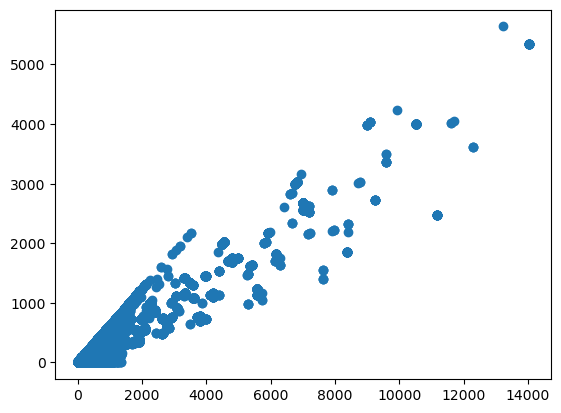

In [244]:
plt.scatter(df_usa['Revenue'], df_usa['Profit'])
plt.show()

In [245]:
reg1.fit(df_usa['Revenue'].values.reshape(-1,1), df_usa['Profit'])


LinearRegression()

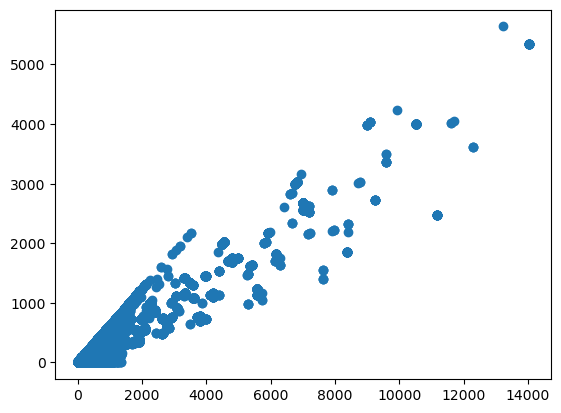

In [254]:
plt.scatter(df_usa['Revenue'], df_usa['Profit'])
plt.show()

x = np.array(df_usa['Revenue'])
y = reg1.intercept_ + x * reg1.coef_

#plt.plot(x, y, 'r')


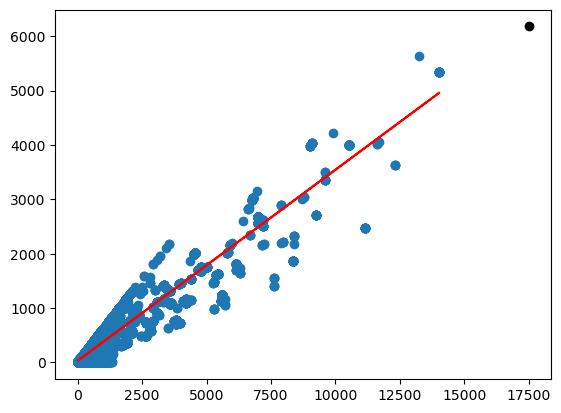

In [255]:
plt.scatter(df_usa['Revenue'], df_usa['Profit'])
plt.scatter(17500,reg1.predict([[17500]])[0],color='k' )

x = np.array(df_usa['Revenue'])
y = reg1.intercept_ + x * reg1.coef_
plt.plot(x, y, 'r');

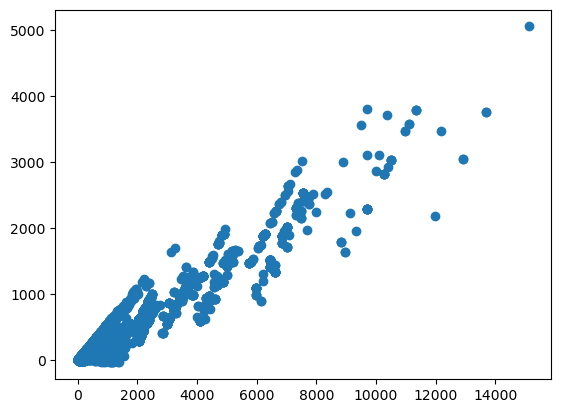

In [256]:
plt.scatter(df_france['Revenue'], df_france['Profit'])
plt.show()

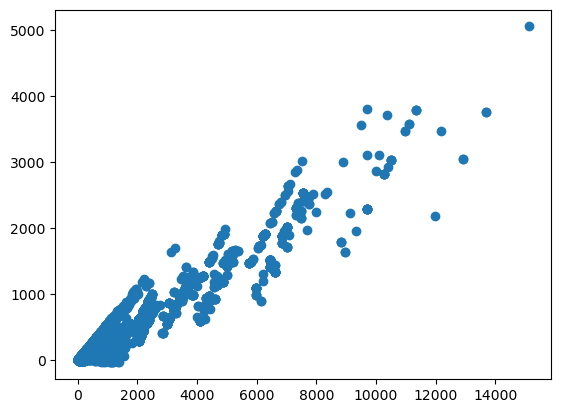

In [257]:
plt.scatter(df_france['Revenue'], df_france['Profit'])
plt.show()

x = np.array(df_france['Revenue'])
y = reg2.intercept_ + x * reg2.coef_

#plt.plot(x, y, 'r')


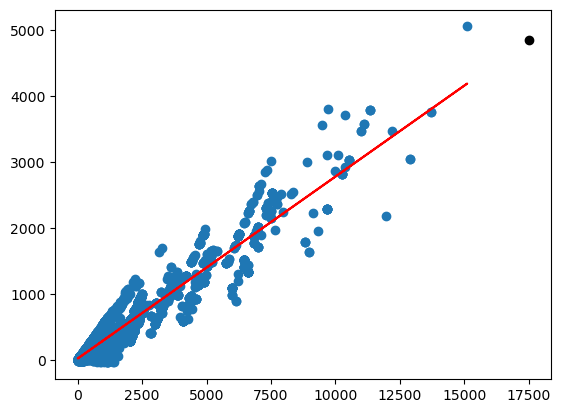

In [258]:
plt.scatter(df_france['Revenue'], df_france['Profit'])
plt.scatter(17500,reg2.predict([[17500]])[0],color='k' )

x = np.array(df_france['Revenue'])
y = reg2.intercept_ + x * reg2.coef_
plt.plot(x, y, 'r')